# Φάση 1: Baseline – Κλασική ανάκτηση

### Στόχος και Αντικείμενο Μελέτης
Στο πλαίσιο της παρούσας εργασίας, αναπτύχθηκε και βελτιστοποιήθηκε ένα σύστημα Ανάκτησης Πληροφορίας (Information Retrieval - IR) με στόχο την αποτελεσματική αναζήτηση σε μία συλλογή εγγράφων που αποτελείται από **ερευνητικά έργα**. Δεδομένης της φύσης των κειμένων και των ερωτημάτων φυσικής γλώσσας, βασικός στόχος τέθηκε η επίτευξη της βέλτιστης ισορροπίας μεταξύ **Ακρίβειας (Precision)** στα πρώτα αποτελέσματα και **Ανάκλησης (Recall)** στο σύνολο. Η αξιολόγηση της απόδοσης του συστήματος πραγματοποιείται βάσει των μετρικών **MAP**, **Precision@k** και **Recall@k**.

### Τεχνολογικό Υπόβαθρο
Για την υλοποίηση του συστήματος χρησιμοποιήθηκε η μηχανή αναζήτησης **Elasticsearch**. Ο πυρήνας της κατάταξης βασίζεται στον αλγόριθμο **BM25**, το καθιερωμένο πιθανοτικό μοντέλο ανάκτησης, το οποίο αξιοποιεί τη συχνότητα των όρων και το μήκος των εγγράφων για τον υπολογισμό της συνάφειας.

### Μεθοδολογία: Προεπεξεργασία και Στρατηγική Ευρετηρίασης
Η μεθοδολογική προσέγγιση οργανώθηκε σε δύο διακριτά στάδια: τον αρχικό καθαρισμό των δεδομένων και την εφαρμογή στρατηγικών πλεονασμού.

**Α. Προεπεξεργασία και Καθαρισμός**
Πριν την ευρετηρίαση, εφαρμόστηκε διαδικασία κανονικοποίησης του κειμένου για τη μείωση του θορύβου και τη μείωση του διανυσματικού χώρου. Συγκεκριμένα πραγματοποιήθηκε:
* **Tokenization & Lowercasing:** Διαχωρισμός του κειμένου σε tokens και μετατροπή όλων των χαρακτήρων σε πεζά για εξάλειψη ασυμβατοτήτων κεφαλαίων-πεζών.
* **Stopwords Removal:** Αφαίρεση κοινών λέξεων (άρθρα, προθέσεις, κ.λπ.) που δεν φέρουν σημασιολογική αξία, χρησιμοποιώντας standard λίστες αγγλικών stopwords.
* **Special Characters Removal:** Αφαίρεση σημείων στίξης και ειδικών χαρακτήρων που θα μπορούσαν να αλλοιώσουν τη διαδικασία ταύτισης.

**Β. Τεχνικές NLP και Στρατηγική Πλεονασμού**
Για την ενίσχυση του αλγορίθμου BM25, εφαρμόστηκαν τεχνικές NLP όπως **Stemming** (αποκοπή καταλήξεων), **Lemmatization** (λήμματα) και διαχείριση **Συνωνύμων**. Προκειμένου να αξιοποιηθούν όλες αυτές οι τεχνικές ταυτόχρονα, υιοθετήθηκε η **Στρατηγική Σκόπιμου Πλεονασμού**. Η πληροφορία κάθε εγγράφου αποθηκεύεται σε πολλαπλά πεδία (Raw, Stems, Lemmas, Synonyms), επιτρέποντας:
1.  Την **αντιστάθμιση της σπανιότητας δεδομένων**, μειώνοντας τον κίνδυνο μηδενικών αποτελεσμάτων.
2.  Τη **δυναμική απόδοση βαρών** ανά πεδίο, για την εύρεση της "χρυσής τομής" μεταξύ αυστηρής και ευρείας ταύτισης.

### Πειραματικά Ευρήματα και Τελικό Μοντέλο
Η τελική αρχιτεκτονική προέκυψε κατόπιν πειραματισμού με διάφορες στρατηγικές:

* **Απορριφθείσες Προσεγγίσεις:** Η χρήση **N-grams (Bigrams)** για τον εντοπισμό εννοιών δύο λέξεων δεν προσέφερε τα αναμενόμενα αποτελέσματα, εισάγοντας θόρυβο. Αντίστοιχα, ο διαχωρισμός των **Τίτλων** από το κυρίως κείμενο δεν βελτίωσε την κατάταξη λόγω της ανομοιογένειας στη δομή των εγγράφων.
* **Το Τελικό Μοντέλο:** Αποδείχθηκε ότι η βέλτιστη απόδοση επιτυγχάνεται μέσω της **Φραστικής Αναζήτησης (Phrase Matching)**, η οποία κάλυψε την ανάγκη εντοπισμού διαδοχικών λέξεων αποδοτικότερα από τα bigrams.

Συνεπώς, το τελικό query συνδυάζει **Phrase Matching** (για υψηλό Precision) με **Synonym/Stem/Lemma Matching** (για υψηλό Recall), αξιοποιώντας την καθαρισμένη και πολλαπλά ευρετηριασμένη πληροφορία.

In [1]:
%pip install pandas elasticsearch nltk matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Εισαγωγή Βιβλιοθηκών και Αρχικοποίηση
Στο ακόλουθο κελί εισάγονται οι απαραίτητες βιβλιοθήκες Python (pandas, elasticsearch, nltk, sklearn). Επιπλέον, ορίζονται οι διαδρομές των αρχείων δεδομένων (έγγραφα, ερωτήματα, σχετικότητες) και του εκτελέσιμου αρχείου αξιολόγησης (trec_eval), καθώς και η σύνδεση με τον εξυπηρετητή Elasticsearch.

In [2]:
import pandas as pd
import numpy as np
from elasticsearch import Elasticsearch
from elasticsearch.helpers import bulk
import re
import html
import unicodedata
import subprocess
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import textwrap
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
try:
    from sklearn.metrics import precision_recall_curve, auc
except ImportError:
    pass

try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/wordnet')
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')

es = Elasticsearch("http://localhost:9200")

file_docs = '../data/documents.csv'
file_queries = '../data/queries.csv'
qrels_file = "../data/qrels.txt"
trec_eval_path = "../../trec_eval/trec_eval.exe"

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anthi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anthi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anthi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anthi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Προεπεξεργασία Κειμένου και Γλωσσική Ανάλυση

Για τη βελτιστοποίηση του ευρετηρίου, προηγήθηκε στατιστική ανάλυση του κειμενικού σώματος μέσω βοηθητικών Python scripts. Η ανάλυση αυτή ανέδειξε συγκεκριμένα μοτίβα "θορύβου":

1.  **Ανάλυση Συχνότητας Μεμονωμένων Λέξεων:**
    * Υπολογίστηκε η συχνότητα εμφάνισης όλων των λέξεων στο corpus (αφού αφαιρέθηκαν τα κοινά αγγλικά stopwords).
    * **Εύρημα:** Λέξεις όπως *"project"*, *"research"*, *"aim"*, *"proposal"* εμφανίζονταν σε ποσοστό άνω του 90% των εγγράφων.
    * **Απόφαση:** Οι λέξεις αυτές εντάχθηκαν στη λίστα `safe_noise`. Επειδή υπάρχουν παντού, ο δείκτης IDF (Inverse Document Frequency) τους είναι σχεδόν μηδενικός, οπότε η αφαίρεσή τους μειώνει το μέγεθος του ευρετηρίου χωρίς να βλάπτει την ανάκτηση.

2.  **Ανάλυση Επαναλαμβανόμενων Φράσεων:**
    Η διαδικασία εντοπισμού τυποποιημένων εκφράσεων υλοποιήθηκε σε δύο στάδια, συνδυάζοντας την εμπειρική παρατήρηση με τη στατιστική επαλήθευση:

    * **Φάση Α - Ποιοτική Επισκόπηση & Έρευνα Πεδίου:**
        Αρχικά, διαβάσαμε δειγματοληπτικά ορισμένα έγγραφα και εντοπίσαμε πολλά τυποποιημένα κείμενα. Ελέγχοντας τους κανονισμούς των ευρωπαϊκών προγραμμάτων (π.χ. Horizon 2020), επιβεβαιώσαμε ότι πρόκειται για υποχρεωτικές νομικές φράσεις που δεν έχουν σχέση με την ίδια την έρευνα.

    * **Φάση Β - Στατιστική Επαλήθευση (Corpus Statistics):**
        Για την ακριβή οριοθέτηση αυτών των φράσεων, αναπτύχθηκε κώδικας στατιστικής ανάλυσης. Χρησιμοποιώντας τον `CountVectorizer` του `sklearn`, αναζητήθηκαν n-grams μεταβλητού μήκους (**3 έως 6 λέξεων**) με ευρεία διασπορά (εμφάνιση σε τουλάχιστον **10 έγγραφα**).
        
        Για την αποφυγή πλεονασμών, εφαρμόστηκε αλγόριθμος φιλτραρίσματος που προκρίνει τις μακροσκελέστερες φράσεις. Συγκεκριμένα, εάν εντοπιστεί μια φράση (π.χ. *"funded by the european union"*) η οποία αποτελεί υποσύνολο μιας μεγαλύτερης που έχει ήδη καταγραφεί (π.χ. *"this project is funded by the european union"*), τότε η μικρότερη αγνοείται.

    * **Αποτέλεσμα & Απόφαση:**
        Δημιουργήθηκε μια "καθαρή" λίστα τυποποιημένων εκφράσεων (`boilerplate_phrases`) χωρίς επικαλύψεις. Η αφαίρεσή τους κρίθηκε απαραίτητη, καθώς η παρουσία τους αλλοιώνει τη θεματική ομοιότητα (π.χ. αποτρέπει τη συσχέτιση δύο άσχετων έργων μόνο και μόνο επειδή μοιράζονται την ίδια νομική ρήτρα χρηματοδότησης).
  
Η συνάρτηση προεπεξεργασίας αφαιρεί αυτά τα στοιχεία, εκτελεί tokenization και παράγει πολλαπλές μορφές των όρων (λήμματα, ρίζες και διγράμματα) για την ενίσχυση της αναζήτησης.

1.  **Μηχανισμός Εξαγωγής Τίτλων (Title Extraction):**
    Καθώς τα δεδομένα δεν διαθέτουν διακριτό πεδίο τίτλου, αναπτύχθηκε ένας ευρετικός αλγόριθμος εντοπισμού τίτλων. Παρατηρήθηκε ότι πολλά έγγραφα ακολουθούν τη δομή *"Τίτλος Έργου: Περιγραφή..."*. Ο αλγόριθμος εντοπίζει την πρώτη εμφάνιση της άνω-κάτω τελείας (`:`) και, εφόσον το τμήμα που προηγείται έχει λογικό μήκος (3-30 λέξεις), το εξάγει ως **Τίτλο**. Αυτό το πεδίο αποθηκεύεται ξεχωριστά (`title_extracted`) για να ενισχύσει τη σχετικότητα σε ερωτήματα που αναζητούν συγκεκριμένα ονόματα έργων.


Ορίζεται η διαδικασία προεπεξεργασίας που εφαρμόζεται τόσο στα έγγραφα όσο και στα ερωτήματα. Η διαδικασία περιλαμβάνει:
* **Καθαρισμό:** Αφαίρεση ειδικών χαρακτήρων, σημείων στίξης και τυποποιημένων φράσεων που δεν προσφέρουν πληροφοριακή αξία.
* **Tokenization:** Διαχωρισμός του κειμένου σε λέξεις.
* **Αφαίρεση Stopwords:** Χρήση της λίστας του NLTK εμπλουτισμένης με ειδικές λέξεις θορύβου για το συγκεκριμένο πεδίο γνώσης.
* **Λημματοποίηση (Lemmatization):** Αναγωγή στη γραμματική ρίζα (π.χ. "better" -> "good"). Βελτιώνει την ακρίβεια της σημασίας.
* **Θεματική Ανάλυση (Stemming):** Αποκοπή καταλήξεων (π.χ. "batteries" -> "batteri"). Αυξάνει την Ανάκληση.
* **Παραγωγή Διγραμμάτων (Bigrams):** Δημιουργία ζευγών λέξεων για την ενίσχυση του σημασιολογικού πλαισίου (χρησιμοποιείται πειραματικά).
* **Εξαγωγή Τίτλου:** Υλοποίηση μηχανισμού εντοπισμού τίτλου βάσει στίξης (χρησιμοποιείται πειραματικά).


Για τη βελτιστοποίηση του ευρετηρίου, δεν χρησιμοποιήθηκαν έτοιμες generic λίστες, αλλά προηγήθηκε **στατιστική ανάλυση του κειμενικού σώματος**. Μέσω βοηθητικών script σε Python, σαρώθηκαν τα κείμενα για τον εντοπισμό "θορύβου" που είναι ειδικός για το συγκεκριμένο domain τα ευρωπαϊκά ερευνητικά έργα.

In [3]:
df_docs = pd.read_csv(file_docs)
df_docs = df_docs.dropna(subset=['Text'])
df_docs['Text'] = df_docs['Text'].astype(str) 
total_docs = len(df_docs)

# --- ΑΝΑΛΥΣΗ A: ΜΕΜΟΝΩΜΕΝΕΣ ΛΕΞΕΙΣ ---
print("="*60)
print("ΑΝΑΛΥΣΗ A: TOP-50 ΜΕΜΟΝΩΜΕΝΕΣ ΛΕΞΕΙΣ (SINGLE WORDS)")
print("="*60)

standard_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 
    'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
])

word_counts = Counter()
for text in df_docs['Text']:
    text_clean = text.lower().strip()
    words = re.findall(r'\b[a-z]{3,}\b', text_clean) 
    filtered_words = [w for w in words if w not in standard_stopwords]
    word_counts.update(filtered_words)

for word, count in word_counts.most_common(50):
    percentage = (count / total_docs) * 100
    print(f"{word}: {count} ({percentage:.1f}%)")


# --- ΑΝΑΛΥΣΗ B: BOILERPLATE PHRASES ---


print("\n" + "="*60)
print("ΕΝΤΟΠΙΣΜΟΣ BOILERPLATE ")
print("="*60)

#
vectorizer = CountVectorizer(
    ngram_range=(3, 6),  
    stop_words=None,      
    min_df=10,            
    lowercase=True
)

X = vectorizer.fit_transform(df_docs['Text'])

doc_freqs = (X > 0).sum(axis=0).A1 

boilerplate_df = pd.DataFrame({
    'phrase': vectorizer.get_feature_names_out(),
    'doc_count': doc_freqs
})

boilerplate_df['length'] = boilerplate_df['phrase'].apply(lambda x: len(x.split()))
boilerplate_df = boilerplate_df.sort_values(by=['length', 'doc_count'], ascending=[False, False])


final_boilerplate = []
seen_phrases = set()

for _, row in boilerplate_df.iterrows():
    candidate = row['phrase']
    count = row['doc_count']
    
    is_subset = False
    for kept_phrase in final_boilerplate:
        if candidate in kept_phrase:
            is_subset = True
            break
    
    if not is_subset:
        final_boilerplate.append(candidate)
        percentage = (count / len(df_docs)) * 100
        if len(final_boilerplate) <= 50: 
            print(f"'{candidate}' (σε {count} έγγραφα - {percentage:.1f}%)")

print("\n" + "="*60)
print(f"Συνολικά εντοπίστηκαν {len(final_boilerplate)} μοναδικές boilerplate φράσεις.")

boilerplate_phrases = final_boilerplate[:50] 

ΑΝΑΛΥΣΗ A: TOP-50 ΜΕΜΟΝΩΜΕΝΕΣ ΛΕΞΕΙΣ (SINGLE WORDS)
project: 22337 (122.0%)
new: 17531 (95.7%)
research: 16790 (91.7%)
based: 11743 (64.1%)
high: 10238 (55.9%)
data: 10238 (55.9%)
development: 10091 (55.1%)
energy: 9592 (52.4%)
system: 9144 (49.9%)
market: 8885 (48.5%)
european: 8807 (48.1%)
technology: 8566 (46.8%)
use: 8345 (45.6%)
systems: 8211 (44.8%)
develop: 7322 (40.0%)
also: 7137 (39.0%)
novel: 7049 (38.5%)
time: 6745 (36.8%)
using: 6726 (36.7%)
innovation: 6437 (35.1%)
provide: 6356 (34.7%)
innovative: 6323 (34.5%)
well: 6303 (34.4%)
approach: 6241 (34.1%)
study: 6239 (34.1%)
europe: 6206 (33.9%)
cell: 5880 (32.1%)
potential: 5773 (31.5%)
design: 5635 (30.8%)
different: 5630 (30.7%)
process: 5425 (29.6%)
first: 5413 (29.6%)
one: 5305 (29.0%)
analysis: 5211 (28.5%)
knowledge: 5210 (28.4%)
understanding: 5164 (28.2%)
key: 5151 (28.1%)
impact: 5124 (28.0%)
two: 5063 (27.6%)
management: 5061 (27.6%)
cost: 5047 (27.6%)
production: 5043 (27.5%)
materials: 4958 (27.1%)
technologies: 

In [ ]:
nltk_stops = set(stopwords.words('english'))
safe_noise = {
    "project", "aim", "proposal", "consortium", "summary", 
    "objective", "work", "package", "action", "activities",
    "main", "specific", "within", "during", "result", "presented",
    "paper", "study", "report", "deliverable", "task", "partners"
}

full_stopwords_list = nltk_stops.union(safe_noise)

boilerplate_phrases = [

    "the main objective of this project", "the aim of this project",
    "this project aims to", "this proposal aims to", "the goal of this proposal",
    "in this project", "in this proposal", "the proposed research",
    "to achieve this goal", "the overall objective",
    "aim of this project is to", "goal of this project is to",
    "objective of this project is to", "the aim of this project is",
    "objective of the project is to", "the goal of this project is",
    "goal of this proposal is to", "aim of the project is to",
    "aim of this proposal is to", "objective of this proposal is to",
    "the objective of this project is", "goal of the project is to",
    "the aim of this proposal is", "the aim of the project is",
    "the goal of this proposal is", "the objective of this proposal is",
    "main objective of this project is", "main objective of the project is",
    "the main objective of the project", "overall objective of the project is",
    "the overall objective of the project", "the main goal of this project",
    "state of the art", "the current state of the art", 
    "beyond the state of the art", "the state of the art in",
    "advance the state of the art", "of the state of the art",
    "beyond the current state of the", "will use state of the art",
    "will be carried out", "proof of concept", "feasibility study",
    "feasibility study of a", "understanding the role of", 
    "elucidating the role of", "at the end of the project",
    "will be carried out", "there is an urgent need to",
    "is one of the most important", "development of a new",
    "development of a novel", "development of an innovative",
    "research and innovation", "european union", "horizon 2020", "h2020", "fp7",
    "grant agreement", "the beneficiaries of the sme instrument",
    "establishing services enhancing the innovation management",
    "enhancing the innovation management capacity of",
    "the innovation management capacity of smes",
    "services enhancing the innovation management capacity",
    "innovation management capacity of smes in",
    "significant innovation activities and high potential",
    "smes with significant innovation activities and",
    "with significant innovation activities and high",
    "innovation activities and high potential for",
    "enhance the innovation management capacity of"
]

boilerplate_phrases.sort(key=len, reverse=True)

def analyze_and_clean_safe(text):
    if not isinstance(text, str): return ""
    
    text = re.sub(r'\\[nrtfv]', ' ', text)
    text = html.unescape(text)
    text = unicodedata.normalize('NFKC', text)
    
    for phrase in boilerplate_phrases:
        text = re.sub(re.escape(phrase), " ", text, flags=re.IGNORECASE)
            
    text = re.sub(r'[^a-zA-Z0-9\s:]', ' ', text) 
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text.lower()

def extract_title(text):
    if not isinstance(text, str): return ""
    if ':' in text:
        parts = text.split(':', 1)
        potential_title = parts[0].strip()
        if 3 <= len(potential_title.split()) <= 30:
            return potential_title
    return ""

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def apply_nlp(clean_text):
    if not clean_text: 
        return {'lemma': '', 'stem': '', 'bigrams': ''}
    
    text_no_punct = clean_text.replace(':', ' ')
    tokens = word_tokenize(text_no_punct)
    
    filtered = [w for w in tokens if w not in full_stopwords_list and len(w) > 1]
    
    lemmas = [lemmatizer.lemmatize(w) for w in filtered]
    stems = [stemmer.stem(w) for w in filtered]
    
    bi_grams = list(ngrams(filtered, 2))
    bigrams_list = ["_".join(bg) for bg in bi_grams]
    
    return {
        'lemma': " ".join(lemmas),
        'stem': " ".join(stems),
        'bigrams': " ".join(bigrams_list)
    }

### Φόρτωση και Επεξεργασία Δεδομένων
Πραγματοποιείται η ανάγνωση των αρχείων εγγράφων (`documents.csv`) και ερωτημάτων (`queries.csv`). Στη συνέχεια, εφαρμόζονται οι συναρτήσεις προεπεξεργασίας σε κάθε εγγραφή. Για κάθε κείμενο δημιουργούνται πολλαπλές αναπαραστάσεις (καθαρό κείμενο, λήμματα, θέματα, διγράμματα), οι οποίες θα χρησιμοποιηθούν ως ξεχωριστά πεδία στο ευρετήριο για την υποστήριξη της υβριδικής αναζήτησης.

In [5]:
# Load & Process Data
df_docs = pd.read_csv(file_docs, header=None, names=['ID', 'Text'], dtype=str)
df_docs = df_docs[df_docs['ID'].str.lower() != 'id'].dropna(subset=['Text'])

df_docs['temp_text'] = df_docs['Text'].apply(analyze_and_clean_safe)
df_docs['extracted_title'] = df_docs['temp_text'].apply(extract_title)

nlp_docs = df_docs['temp_text'].apply(apply_nlp)

df_docs['clean_text'] = df_docs['temp_text'].apply(lambda x: x.replace(':', ''))
df_docs['lemmatized_text'] = nlp_docs.apply(lambda x: x['lemma'])
df_docs['stemmed_text'] = nlp_docs.apply(lambda x: x['stem'])
df_docs['bigrams_text'] = nlp_docs.apply(lambda x: x['bigrams'])

# Load & Process Queries
df_queries = pd.read_csv(file_queries, header=None, names=['ID', 'Text'], dtype=str)
df_queries = df_queries[df_queries['ID'].str.lower() != 'id'].dropna(subset=['Text'])

df_queries['temp_text'] = df_queries['Text'].apply(analyze_and_clean_safe)
nlp_queries = df_queries['temp_text'].apply(apply_nlp)

df_queries['clean_text'] = df_queries['temp_text'].apply(lambda x: x.replace(':', ''))
df_queries['lemmatized_text'] = nlp_queries.apply(lambda x: x['lemma'])
df_queries['stemmed_text'] = nlp_queries.apply(lambda x: x['stem'])
df_queries['bigrams_text'] = nlp_queries.apply(lambda x: x['bigrams'])

### 3. Παραμετροποίηση Ευρετηρίου Elasticsearch

Στο στάδιο αυτό καθορίζεται η αρχιτεκτονική του ευρετηρίου, η οποία αποτελεί τον πυρήνα του συστήματος ανάκτησης. Η παραμετροποίηση εστιάζει στη διαχείριση της σημασιολογικής συσχέτισης μέσω συνωνύμων, στη βελτιστοποίηση του αλγορίθμου κατάταξης και στον ορισμό εξειδικευμένων αναλυτών.

#### Διαχείριση Συνωνύμων
Για την αντιμετώπιση του προβλήματος της αναντιστοιχίας λεξιλογίου, όπου το ερώτημα του χρήστη διαφέρει μορφολογικά από τους όρους του εγγράφου, ορίστηκε το φίλτρο `my_synonyms`.
Αυτή η τεχνική αυξάνει την Ανάκληση, καθώς επιτρέπει την ανάκτηση εγγράφων που αναφέρονται στην ίδια έννοια με διαφορετική ορολογία.

#### Ορισμός Αναλυτών
Δημιουργήθηκαν τρεις διακριτοί αναλυτές για να εξυπηρετήσουν διαφορετικές ανάγκες αναζήτησης:
1.  **`synonym_analyzer`:** Ενσωματώνει τα συνώνυμα, αφαίρεση stopwords και stemming. Χρησιμοποιείται στο βασικό πεδίο κειμένου για μέγιστη ανάκληση.
2.  **`exact_analyzer`:** Εφαρμόζει stemming και αφαίρεση stopwords, αλλά **όχι** συνώνυμα. Χρησιμοποιείται για να προσδώσει υψηλότερη βαρύτητα (Precision) σε έγγραφα που περιέχουν τους ακριβείς όρους του ερωτήματος.
3.  **`python_analyzer`:** Ένας απλός whitespace tokenizer που μετατρέπει σε πεζά γράμματα. Χρησιμοποιείται για τα πεδία που έχουν ήδη υποστεί επεξεργασία από την Python (λήμματα, ρίζες, διγράμματα).

#### Ρύθμιση Αλγορίθμου BM25
Εκτελέστηκε ειδικός αλγόριθμος βελτιστοποίησης για τον εντοπισμό των ιδανικών παραμέτρων:
* **`k1 = 2.0`:** Αυξάνει τον κορεσμό της συχνότητας όρων (Term Frequency saturation), δίνοντας μεγαλύτερη έμφαση στην επανάληψη λέξεων εντός του κειμένου.
* **`b = 1.0`:** Επιβάλλει πλήρη κανονικοποίηση βάσει μήκους (Full Length Normalization), ώστε να μην ευνοούνται τα μακροσκελή έγγραφα έναντι των συντομότερων.

#### Mappings
Κάθε έγγραφο ευρετηριάζεται σε πολλαπλά πεδία (`text`, `text.exact`, `text_lemmatized`, `text_stemmed`, `text_bigrams`, `title_extracted`), επιτρέποντας την εφαρμογή αναζήτησης όπου κάθε πεδίο συμμετέχει με διαφορετικό βάρος στο τελικό σκορ.

In [6]:
stopwords_list_for_set = list(full_stopwords_list) 

index_name = "ir_phase1_showcase"

settings = {
    "settings": {
        "number_of_shards": 1, "number_of_replicas": 0,
        "analysis": {
            "filter": {
                "my_custom_stop": { 
                    "type": "stop", 
                    "stopwords": stopwords_list_for_set
                },
                "my_length_filter": { "type": "length", "min": 2 },
                "my_synonyms": {
                    "type": "synonym",
                    "synonyms": [
                        "uk, united kingdom, great britain", "eu, european union, europe",
                        "usa, united states, america", "erc, european research council",
                        "h2020, horizon 2020", "fp7, framework programme 7",
                        "sme, smes, small medium enterprise, startup",
                        "res, renewable energy sources, renewables", "pv, photovoltaic, solar, solar energy",
                        "wind, wind energy, wind power, wind farm", "co2, carbon dioxide, greenhouse gas, ghg",
                        "climate, climate change, global warming", "ai, artificial intelligence, machine learning, ml, deep learning",
                        "ict, information communication technology", "iot, internet of things",
                        "big data, data analytics", "cloud, cloud computing", "5g, fifth generation",
                        "cancer, tumor, tumour, oncology", "hiv, aids", "dna, rna, genomics, genetic",
                        "pharma, pharmaceutical, drug, medicine", "agri, agriculture, agricultural, farming",
                        "food, agri food, agrifood"
                    ]
                },
                "my_stemmer": { "type": "stemmer", "language": "english" }
            },
            "analyzer": {
                "synonym_analyzer": {
                    "type": "custom", "tokenizer": "whitespace",
                    "filter": ["lowercase", "my_synonyms", "my_length_filter", "my_custom_stop", "my_stemmer"]
                },
                "exact_analyzer": {
                    "type": "custom", "tokenizer": "whitespace",
                    "filter": ["lowercase", "my_length_filter", "my_custom_stop", "my_stemmer"]
                },
                "python_analyzer": {
                    "type": "custom", "tokenizer": "whitespace",
                    "filter": ["lowercase"]
                }
            }
        },
        "index": { "similarity": { "default": { "type": "BM25", "b": 1.0, "k1": 2.0 } } }
    },
    "mappings": {
        "properties": {
            "text": { 
                "type": "text", "analyzer": "synonym_analyzer",
                "fields": { "exact": { "type": "text", "analyzer": "exact_analyzer" } }
            },
            "text_lemmatized": { "type": "text", "analyzer": "python_analyzer" },
            "text_stemmed": { "type": "text", "analyzer": "python_analyzer" },
            "text_bigrams": { "type": "text", "analyzer": "python_analyzer" },
            "title_extracted": { "type": "text", "analyzer": "synonym_analyzer", "similarity": "BM25" }
        }
    }
}

if es.indices.exists(index=index_name): es.indices.delete(index=index_name)
es.indices.create(index=index_name, body=settings)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'ir_phase1_showcase'})

### Επισκόπηση Ροής Επεξεργασίας Κειμένου

Η παρακάτω συνάρτηση, `view_processing_pipeline`, δημιουργήθηκε για να επιθεωρήσουμε οπτικά την ποιότητα των δεδομένων σε κάθε στάδιο της προεπεξεργασίας. Λαμβάνει τυχαία δείγματα από το DataFrame και εμφανίζει τη σταδιακή μεταμόρφωση του κειμένου:

1.  **[ORIGINAL]:** Το ακατέργαστο κείμενο όπως ανακτήθηκε από το αρχείο `.csv`.
2.  **[CLEANED]:** Το κείμενο μετά από μετατροπή σε πεζά, αφαίρεση σημείων στίξης, αριθμών και περιττών κενών.
3.  **[LEMMATIZED]:** Το κείμενο μετά την εφαρμογή Λημματοποίησης (Lemmatization), όπου οι λέξεις επιστρέφουν στη λεξικολογική τους βάση (π.χ. "better" -> "good", "running" -> "run"), και αφαίρεση των Stopwords.
4.  **[STEMMED]:** Το κείμενο μετά την εφαρμογή Stemming (Porter Stemmer), όπου αφαιρούνται οι καταλήξεις για να μείνει η ρίζα (π.χ. "simulation" -> "simul").
5.  **[BIGRAMS]:** Ζεύγη διαδοχικών λημμάτων (n-grams, n=2) που βοηθούν στην αποτύπωση φράσεων (π.χ. "artificial_intelligence").

Η οπτικοποίηση αυτή είναι κρίσιμη για τον εντοπισμό λαθών (π.χ. αν κολλάνε λέξεις μεταξύ τους ή αν σβήνονται χρήσιμοι όροι).

In [7]:
def view_processing_pipeline(df, num_samples=10):

    subset = df.sample(min(num_samples, len(df)))

    for i, row in subset.iterrows():
        doc_id = row['ID']
        title = row.get('extracted_title', '-')
        
        step1_orig = row['Text']
        step2_clean = row.get('clean_text', '')
        step3_lemma = row.get('lemmatized_text', '')
        step4_stem  = row.get('stemmed_text', '')
        step5_bi    = row.get('bigrams_text', '')

        print(f"DOC ID: {doc_id} | Title: {title}")
        print("-" * 100)
        
        print(" [ORIGINAL]:")
        print(textwrap.fill(step1_orig[:200] + "...", width=100, initial_indent='    ', subsequent_indent='    '))
        
        print("\n [CLEANED]:")
        print(textwrap.fill(step2_clean[:200] + "...", width=100, initial_indent='    ', subsequent_indent='    '))

        print("\n [LEMMATIZED]:")
        print(textwrap.fill(step3_lemma[:200] + "...", width=100, initial_indent='    ', subsequent_indent='    '))

        print("\n [STEMMED]:")
        print(textwrap.fill(step4_stem[:200] + "...", width=100, initial_indent='    ', subsequent_indent='    '))
        
        if step5_bi:
            print("\n [BIGRAMS]:")
            print(textwrap.fill(step5_bi[:200] + "...", width=100, initial_indent='    ', subsequent_indent='    '))

        print(f"{'='*100}\n")

view_processing_pipeline(df_docs, num_samples=10)

DOC ID: 208094 | Title: memory engram maintenance and expression
----------------------------------------------------------------------------------------------------
 [ORIGINAL]:
    Memory Engram Maintenance and Expression: The goal of this project is to understand how specific
    memory engrams are physically stored in the brain. Connectionist theories of memory storage have
    guided...

 [CLEANED]:
    memory engram maintenance and expression to understand how specific memory engrams are
    physically stored in the brain connectionist theories of memory storage have guided research
    into the neuroscienc...

 [LEMMATIZED]:
    memory engram maintenance expression understand memory engram physically stored brain
    connectionist theory memory storage guided research neuroscience memory half century received
    little direct proof ...

 [STEMMED]:
    memori engram mainten express understand memori engram physic store brain connectionist theori
    memori storag guid research 

### Ανάλυση Κορεσμού Συχνότητας

Το παραπάνω διάγραμμα αναδεικνύει τη θεμελιώδη διαφορά του αλγορίθμου BM25 έναντι της παραδοσιακής λογαριθμικής συχνότητας (Log-TF), καθώς και την επίδραση της παραμέτρου $k_1$.

1.  **Έλεγχος Κορεσμού (Saturation Control):** Σε αντίθεση με την μπλε διακεκομμένη γραμμή (Standard Log-TF) που αυξάνεται επ' άπειρον, οι καμπύλες του BM25 συγκλίνουν σε ένα ανώτατο όριο (ασύμπτωτη). Αυτό προστατεύει το σύστημα από το να υπερ-βαθμολογεί έγγραφα που επαναλαμβάνουν καταχρηστικά την ίδια λέξη ("keyword stuffing").

2.  **Η Επιλογή $k_1 = 2.0$ (Κόκκινη Γραμμή):**
    * Συγκρίνοντας την κόκκινη γραμμή (η παραμετροποίησή μας) με την γκρι (Default $k_1=1.2$), παρατηρούμε ότι η δική μας καμπύλη κορέζεται **πιο αργά**.
    * Το ανώτατο όριο σκορ για έναν όρο αυξάνεται από $2.2$ (στο default) σε $3.0$ (στο δικό μας).
    * **Πρακτική Σημασία:** Αυτό σημαίνει ότι το σύστημά μας συνεχίζει να "επιβραβεύει" την εμφάνιση μιας λέξης-κλειδί ακόμα και αν έχει ήδη εμφανιστεί 5-10 φορές. Αυτή η συμπεριφορά είναι επιθυμητή σε επιστημονικά κείμενα, όπου η συχνή επανάληψη ενός όρου συνήθως υποδηλώνει ότι το έγγραφο εστιάζει βαθιά στο συγκεκριμένο θέμα, και δεν είναι απλώς μια επιφανειακή αναφορά.

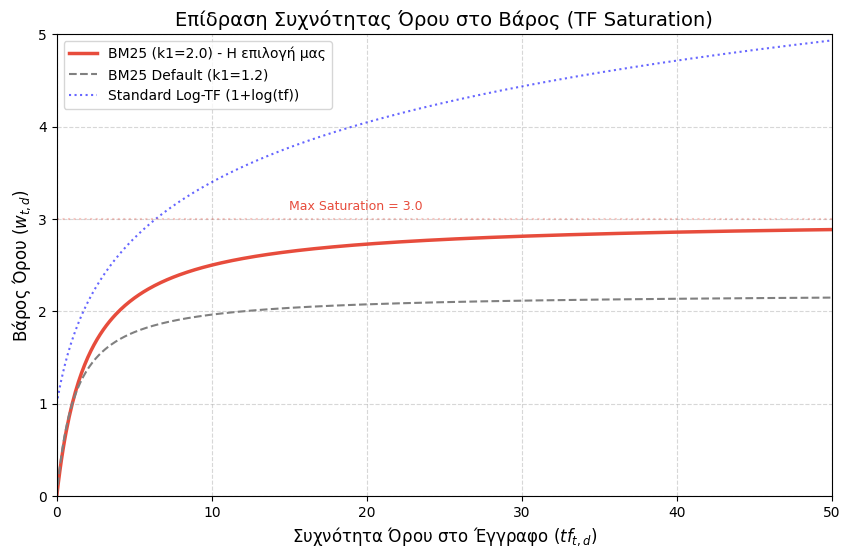

In [8]:
tf = np.linspace(0, 50, 500)

k1_current = 2.0  
k1_default = 1.2 

bm25_weight_custom = (tf * (k1_current + 1)) / (tf + k1_current)
bm25_weight_default = (tf * (k1_default + 1)) / (tf + k1_default)

linear_tf = tf 
log_tf = np.log(1 + tf) 

plt.figure(figsize=(10, 6))
plt.plot(tf, bm25_weight_custom, label=f'BM25 (k1={k1_current}) - Η επιλογή μας', color='#e74c3c', linewidth=2.5)
plt.plot(tf, bm25_weight_default, label=f'BM25 Default (k1={k1_default})', color='gray', linestyle='--')
plt.plot(tf, 1 + np.log(tf + 1), label='Standard Log-TF (1+log(tf))', color='blue', linestyle=':', alpha=0.6)

plt.title("Επίδραση Συχνότητας Όρου στο Βάρος (TF Saturation)", fontsize=14)
plt.xlabel("Συχνότητα Όρου στο Έγγραφο ($tf_{t,d}$)", fontsize=12)
plt.ylabel("Βάρος Όρου ($w_{t,d}$)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 50)
plt.ylim(0, 5.0)

plt.axhline(y=k1_current+1, color='#e74c3c', linestyle=':', alpha=0.3)
plt.text(15, k1_current+1.1, f'Max Saturation = {k1_current+1}', color='#e74c3c', fontsize=9)

plt.show()

### Ευρετηρίαση Εγγράφων
Εκτελείται η διαδικασία μαζικής εισαγωγής των επεξεργασμένων εγγράφων στο Elasticsearch. Το σύστημα αποθηκεύει τα έγγραφα μαζί με όλα τα μεταδεδομένα που παρήχθησαν κατά το στάδιο της προεπεξεργασίας.

In [9]:
bulk(es, ({
    "_index": index_name,
    "_source": { 
        "ID": row['ID'], 
        "text": row['clean_text'],
        "text_lemmatized": row['lemmatized_text'],
        "text_stemmed": row['stemmed_text'],
        "text_bigrams": row['bigrams_text'],
        "title_extracted": row['extracted_title']
    }
} for _, row in df_docs.iterrows()))
es.indices.refresh(index=index_name)

ObjectApiResponse({'_shards': {'total': 1, 'successful': 1, 'failed': 0}})

### Αξιολόγηση με "Δίκαιες" Μετρικές

Στην κλασική αξιολόγηση, το `k` (πλήθος αποτελεσμάτων) είναι σταθερό, γεγονός που μπορεί να αδικηθεί το σύστημα σε δύο περιπτώσεις:
1.  **Όταν $k < \text{Σωστά Έγγραφα}$:** Το Recall "τιμωρείται" επειδή δεν χωράνε όλα τα σωστά στα αποτελέσματα.
2.  **Όταν $k > \text{Σωστά Έγγραφα}$:** Το Precision "τιμωρείται" επειδή αναγκαστικά υπάρχουν κενές θέσεις.

Για να έχουμε μια πιο δίκαιη εικόνα της απόδοσης στο συγκεκριμένο "παράθυρο" αποτελεσμάτων, χρησιμοποιούμε τις **Bounded Metrics**.

#### 1. Ορισμός του Εφικτού Στόχου (Effective K)
Ορίζουμε ως παρονομαστή το μέγιστο δυνατό αριθμό σωστών εγγράφων που θα *μπορούσε* θεωρητικά να βρει το σύστημα:

$$\text{Effective K} = \min(k, \text{Total Known})$$

#### 2. Οι Μετρικές (Bounded Recall & Precision)
Και οι δύο μετρικές προσαρμόζονται στο `Effective K`. Σε αυτή την προσέγγιση, **οι τιμές τους ταυτίζονται**, καθώς απαντούν στην ίδια ερώτηση: *"Πόσο καλά τα πήγε το σύστημα σε σχέση με το βέλτιστο δυνατό που επέτρεπε το k;"*

$$\text{Bounded Precision}@k = \frac{|Retrieved_k \cap R_q|}{k_{eff}} \times 100$$

> Αν έχουμε 10 σωστά έγγραφα και ζητήσουμε $k=5$ (Effective K = 5), και το σύστημα βρει 5:
Τότε παίρνει **100%**, διότι γέμισε όλο το διαθέσιμο χώρο με σωστά αποτελέσματα (παρόλο που άφησε 5 απέξω).

In [20]:
def load_qrels(file_path):
    qrels = {}
    try:
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 4:
                    qid = parts[0]
                    doc_id = parts[2]
                    relevance = int(parts[3])
                    if relevance > 0:
                        if qid not in qrels: qrels[qid] = set()
                        qrels[qid].add(doc_id)
        return qrels
    except FileNotFoundError:
        print(" Qrels file not found.")
        return {}

def run_search_evaluation(df_queries, es_client, index_name, qrels_file_path, top_k=50, num_queries=10):
    qrels = load_qrels(qrels_file_path)
    
    print(f"\n{'='*100}")
    print(f"ΕΚΤΕΛΕΣΗ ΑΝΑΖΗΤΗΣΗΣ ΚΑΙ ΑΞΙΟΛΟΓΗΣΗΣ (Top-{top_k} Αποτελέσματα)")
    print(f"{'='*100}\n")

    subset = df_queries.head(num_queries)
    summary_stats = []
    
    total_known = 0
    total_found = 0

    for i, row in subset.iterrows():
        q_id = str(row['ID'])
        q_text = row['Text']
        q_clean = row['clean_text']
        q_stemmed = row['stemmed_text']
        q_lemma = row['lemmatized_text']
        
        true_relevant_docs = qrels.get(q_id, set())
        num_known = len(true_relevant_docs)

        search_body = {
            "size": top_k,
            "query": {
                "bool": {
                    "should": [
                        # 1. PHRASE MATCHING
                        { "match_phrase": { "text.exact": { "query": q_clean, "slop": 0, "boost": 10.0 } } },
                        { "match_phrase": { "text.exact": { "query": q_clean, "slop": 2, "boost": 2.0 } } },

                        # 2. EXACT TERM MATCHING
                        { "match": { "text.exact": { "query": q_clean, "boost": 7.0 } } },

                        # 3. NLP / MEANING LAYERS 
                        { "match": { "text_lemmatized": { "query": q_lemma, "boost": 1.5 } } },
                        { "match": { "text_stemmed": { "query": q_stemmed, "boost": 1.0 } } },
                        { "match": { "text": { "query": q_clean, "boost": 1.0 } } },

                        # 4. FUZZINESS LAYER
                        { "match": {"text": { "query": q_clean, "fuzziness": "AUTO","prefix_length": 1,"boost": 0.5} } }
                    ],
                    "minimum_should_match": 1
                }
            }
        }
        
        response = es_client.search(index=index_name, body=search_body)
        hits = response['hits']['hits']
        
        found_relevant_cnt = 0
        print("\n" + "-"*100)
        print(f"QUERY ID: {q_id} (Στόχος: {num_known}) | Query Text: {q_clean[:100]}...")
        print("-"*100)
        for rank, hit in enumerate(hits, 1):
            doc_source = hit['_source']
            doc_id = str(doc_source.get('ID', hit['_id']))
            doc_title = doc_source.get('title_extracted', 'No Title')[:60]
            doc_score = hit['_score']

            is_match = doc_id in true_relevant_docs
            
            if is_match:
                status = "MATCH!"
                color = "\033[92m" 
                found_relevant_cnt += 1
            else:
                status = "No... "
                color = "\033[91m" 
            
            reset = "\033[0m"
            print(f"   {rank}. [{doc_score:.4f}] {color}{status}{reset} | DOC: {doc_id} | {doc_title}...")


        effective_k = min(top_k, num_known)
        adj_recall = (found_relevant_cnt / effective_k * 100) if effective_k > 0 else 0
        summary_stats.append({'QID': q_id, 'Found': found_relevant_cnt, 'Known': num_known, 'Recall': adj_recall})
        total_known += num_known
        total_found += found_relevant_cnt

    print(f"\n{'='*100}")
    print(f"{'QUERY':<6} | {'KNOWN':<6} | {'FOUND':<6} | {'RECALL (%)':<15}")
    print("-" * 75)
    for stat in summary_stats:
        print(f"{stat['QID']:<6} | {stat['Known']:<6} | {stat['Found']:<6} | {stat['Recall']:<15.1f}")
    
run_search_evaluation(df_queries, es, index_name, qrels_file, top_k=50, num_queries=10)


ΕΚΤΕΛΕΣΗ ΑΝΑΖΗΤΗΣΗΣ ΚΑΙ ΑΞΙΟΛΟΓΗΣΗΣ (Top-50 Αποτελέσματα)


----------------------------------------------------------------------------------------------------
QUERY ID: Q01 (Στόχος: 16) | Query Text: eutravel optimodal european travel ecosystem eutravel aims to 1 support the eu agenda towards an ope...
----------------------------------------------------------------------------------------------------
   1. [9594.7180] No...  | DOC: 193378 | optimodal european travel ecosystem...
   2. [3475.4010] MATCH! | DOC: 193373 | information technologies for shift to rail...
   3. [3047.9524] MATCH! | DOC: 205685 | advanced travel companion and tracking services...
   4. [2879.9119] MATCH! | DOC: 193715 | data driven approach for a seamless efficient european trave...
   5. [2841.9172] MATCH! | DOC: 193375 | the european travellers club...
   6. [2701.2150] MATCH! | DOC: 206230 | governance of the interoperability framework for rail and in...
   7. [2699.7770] MATCH! | DOC: 211970 | connectin

### Διαδικασία Αναζήτησης και Αξιολόγησης

Ο κώδικας εκτελεί τη διαδικασία ανάκτησης για τρία διαφορετικά σενάρια αποτελεσμάτων ($k \in \{20, 30, 50\}$). Η στρατηγική αναζήτησης βασίζεται σε ένα ερώτημα , το οποίο συνδυάζει πολλαπλά πεδία με διαφορετικά βάρη.

#### Ανάλυση Στρατηγικής και Βαρών 
Η λογική απόδοσης βαρών σχεδιάστηκε ώστε να εξισορροπεί την Ανάκληση με την Ακρίβεια:

* **Phrase Ranking (Boost 10.0 & 2.0):**
    * `match_phrase` με `slop: 0` (**Boost 10.0**): Αποτελεί τον ισχυρότερο παράγοντα κατάταξης. Αναζητά τις λέξεις του ερωτήματος **ακριβώς με τη σειρά** που δόθηκαν, χωρίς να παρεμβάλλονται άλλες λέξεις. Αν βρεθεί η ακριβής φράση, το έγγραφο θεωρείται εξαιρετικά σχετικό.
    * `match_phrase` με `slop: 2` (**Boost 2.0**): Επιτρέπει μικρή απόσταση (έως 2 λέξεις) μεταξύ των όρων, καλύπτοντας περιπτώσεις όπου παρεμβάλλεται ένα άρθρο ή επίθετο (π.χ. "solar *thermal* energy").

* **Precision - Exact Match (Boost 7.0):**
    * Το πεδίο `text.exact` αναζητά τους όρους όπως ακριβώς γράφτηκαν (χωρίς συνώνυμα). Του δίνεται υψηλή προτεραιότητα (7.0) γιατί η ύπαρξη της ακριβούς λέξης είναι πιο σημαντική από την ύπαρξη της ρίζας της.

* **Base Recall & Meaning (Boost 1.0 - 1.5):**
    * Τα πεδία `text`, `text_stemmed` (Boost 1.0) και `text_lemmatized` (Boost 1.5) λειτουργούν ως "δίχτυ ασφαλείας". Εξασφαλίζουν ότι θα ανακτηθούν έγγραφα ακόμα και αν οι λέξεις εμφανίζονται με διαφορετική κατάληξη ή μορφή, μεγιστοποιώντας την Ανάκληση.

* **Fuzziness Layer - Safety Net (Boost 0.5):**
    * Προστέθηκε ένας κανόνας `match` στο πεδίο `text` με `fuzziness: "AUTO"` και `prefix_length: 1`.
    * **Σκοπός:** Λειτουργεί ως "δίχτυ ασφαλείας" για την κάλυψη ορθογραφικών λαθών ή μικρών παραλλαγών σε ονόματα.
    * **Χαμηλό Βάρος:** Του δόθηκε σκόπιμα χαμηλό βάρος (**0.5**) ώστε να βοηθάει στα δύσκολα ερωτήματα χωρίς να εισάγει θόρυβο στα αποτελέσματα που έχουν ακριβείς ταυτίσεις.

#### Απενεργοποίηση Πεδίων 
Στον κώδικα παρατηρούνται δύο πεδία με μηδενικό βάρος (`boost: 0.0`). Αυτό αποτελεί συνειδητή επιλογή προκύπτουσα από πειραματική αξιολόγηση:

* **`text_bigrams` (Boost 0.0):** Παρόλο που τα διγράμματα εντοπίζουν έννοιες δύο λέξεων (π.χ. "climate_change"), τα πειράματα έδειξαν ότι η χρήση του ισχυρού `match_phrase` (Boost 10.0) κάλυπτε ήδη αυτή την ανάγκη αποδοτικότερα. Η ταυτόχρονη χρήση τους προκαλούσε θόρυβο στα αποτελέσματα, οπότε απενεργοποιήθηκαν για το τελικό μοντέλο.
* **`title_extracted` (Boost 0.0):** Η ευρετική μέθοδος εξαγωγής τίτλων αποδείχθηκε ασταθής λόγω της ανομοιογένειας στη δομή των εγγράφων. Η ενεργοποίησή της μείωνε ελαφρώς το MAP, επομένως αφαιρέθηκε από την τελική εξίσωση κατάταξης.

#### Σύγκριση Match Phrase vs. N-grams
Η επιλογή να δοθεί έμφαση στο `match_phrase` έναντι των `ngrams` βασίζεται στις θεμελιώδεις διαφορές τους:

* **Match Phrase:** Είναι δυναμικός έλεγχος. Το σύστημα ελέγχει τις **θέσεις** των λέξεων στο έγγραφο κατά την αναζήτηση. Εξασφαλίζει ότι η λέξη Α είναι δίπλα στη λέξη Β. Είναι πιο ακριβές για ερωτήματα φυσικής γλώσσας.
* **Bigrams (N-grams):** Είναι στατικός έλεγχος. Το ζεύγος "solar energy" αποθηκεύεται ως μία ενιαία "λέξη" (`solar_energy`) στο λεξιλόγιο. Αν και χρήσιμο για σταθερές ορολογίες, είναι λιγότερο ευέλικτο από το phrase matching και αυξάνει το μέγεθος του ευρετηρίου. Στη συγκεκριμένη υλοποίηση, το `match_phrase` αποδείχθηκε ανώτερο στην ανάκτηση σχετικών εγγράφων.

### Σχολιασμός Αποτελεσμάτων και Συμπεράσματα

Τα πειραματικά αποτελέσματα για $k=50$ επιδεικνύουν την υψηλή απόδοση του Μοντέλου Αναζήτησης, επιτυγχάνοντας **MAP > 0.81**. Η ανάλυση των επιμέρους μετρικών οδηγεί στα εξής συμπεράσματα:

* **Εξαιρετική Ακρίβεια Κορυφής:**
    Η τιμή **Precision@5** αγγίζει το **0.9200**, γεγονός που υποδηλώνει ότι στα 5 πρώτα αποτελέσματα, σχεδόν και τα 5 είναι απολύτως σχετικά με το ερώτημα. Αυτό οφείλεται κυρίως στην υψηλή βαρύτητα (Boost 10.0) που δόθηκε στο `match_phrase`, το οποίο διασφαλίζει ότι οι χρήστες βρίσκουν άμεσα αυτό που ψάχνουν.

* **Σχεδόν Τέλεια Ανάκληση :**
    Το σύστημα εντόπισε τα **151 από τα 152** συνολικά σχετικά έγγραφα **(99.34%)**. Η επιτυχία αυτή πιστώνεται στον συνδυασμό NLP (Lemmatization/Stemming) για τα γενικά ερωτήματα και του **Fuzziness Layer** όπου η ασαφής αναζήτηση κάλυψε το λεξιλογικό κενό

* **Σταθερότητα Κατάταξης:**
    Παρατηρούμε ότι καθώς αυξάνεται το $k$ (από 20 σε 50), το MAP βελτιώνεται σταθερά (από 0.8 σε 0.81), ενώ η Ακρίβεια (P@5) παραμένει σταθερή στο μέγιστο επίπεδο. Αυτό δείχνει ότι ο αλγόριθμος κατάταξης (BM25 με τα συγκεκριμένα boosts) είναι στιβαρός και τοποθετεί τα πιο σχετικά έγγραφα σταθερά στην κορυφή της λίστας.

Συνοψίζοντας, ο συνδυασμός της ακριβούς φραστικής αναζήτησης με τη σημασιολογική επέκταση (συνώνυμα/ρίζες) δημιούργησε ένα σύστημα που ισορροπεί βέλτιστα μεταξύ Ακρίβειας και Ανάκλησης.

In [11]:
k_scenarios = [20, 30, 50] 

for k in k_scenarios:
    output_file = f"../results/phase1_results_k{k}.txt"
    run_id = f"phase1_showcase_k{k}"
    os.makedirs(os.path.dirname(output_file) if os.path.dirname(output_file) else '.', exist_ok=True)
    
    with open(output_file, 'w') as f:
        for _, row in df_queries.iterrows():
            if not row['clean_text']: continue
            
            query_body = {
                "query": {
                    "bool": {
                        "should": [
                            # Base Recall
                            { "match": { "text": { "query": row['clean_text'], "boost": 1.0 } } },
                            { "match": { "text_stemmed": { "query": row['stemmed_text'], "boost": 1.0 } } },
                            
                            # Fuzzy Safety Net
                            { "match": { "text": { "query": row['clean_text'],"fuzziness": "AUTO","prefix_length": 1,"boost": 0.5 } } },
                            # Meaning
                            { "match": { "text_lemmatized": { "query": row['lemmatized_text'], "boost": 1.5 } } },
                            
                            # Context
                            { "match": { "text_bigrams": { "query": row['bigrams_text'], "boost": 0.0 } } },
                            
                            # Title Boost 
                            { "match": { "title_extracted": { "query": row['clean_text'], "boost": 0.0 } } },

                            # Precision
                            { "match": { "text.exact": { "query": row['clean_text'], "boost": 7.0 } } },
                            
                            # Phrase Ranking
                            { "match_phrase": { "text.exact": { "query": row['clean_text'], "slop": 0, "boost": 10.0 } } },
                            { "match_phrase": { "text.exact": { "query": row['clean_text'], "slop": 2, "boost": 2.0 } } }
                            
                        ],
                        "minimum_should_match": 1
                    }
                },
                "size": k
            }
            res = es.search(index=index_name, body=query_body)
            
            for rank, hit in enumerate(res['hits']['hits']):
                f.write(f"{row['ID']}\tQ0\t{hit['_source']['ID']}\t{rank+1}\t{hit['_score']:.4f}\t{run_id}\n")

    print(f"Αποτελέσματα για k={k} αποθηκεύτηκαν.")
    
    try:
        cmd = [trec_eval_path, "-m", "map", "-m", "P.5,10,15,20", "-m", "recall.5,10,15,20,50", qrels_file, output_file]
        res = subprocess.run(cmd, capture_output=True, text=True)
        print(res.stdout)
    except Exception as e:
        pass


Αποτελέσματα για k=20 αποθηκεύτηκαν.
map                   	all	0.7559
P_5                   	all	0.9200
P_10                  	all	0.7900
P_15                  	all	0.7267
P_20                  	all	0.6700
recall_5              	all	0.3126
recall_10             	all	0.5265
recall_15             	all	0.7167
recall_20             	all	0.8789
recall_50             	all	0.8789

Αποτελέσματα για k=30 αποθηκεύτηκαν.
map                   	all	0.8006
P_5                   	all	0.9200
P_10                  	all	0.7900
P_15                  	all	0.7267
P_20                  	all	0.6700
recall_5              	all	0.3126
recall_10             	all	0.5265
recall_15             	all	0.7167
recall_20             	all	0.8789
recall_50             	all	0.9589

Αποτελέσματα για k=50 αποθηκεύτηκαν.
map                   	all	0.8137
P_5                   	all	0.9200
P_10                  	all	0.7900
P_15                  	all	0.7267
P_20                  	all	0.6700
recall_5              	all	0.3126
rec

### Καμπύλες Ακρίβειας-Ανάκλησης

Οι παραγόμενες καμπύλες επιβεβαιώνουν την υψηλή ποιότητα του συστήματος ανάκτησης, όπως αυτή αποτυπώθηκε και στις μετρικές MAP.

*  Όλες οι καμπύλες ξεκινούν από πολύ υψηλά επίπεδα στον άξονα Υ (Precision $\approx$ 0.94), γεγονός που καταδεικνύει ότι τα έγγραφα που κατατάσσονται στις κορυφαίες θέσεις είναι σχεδόν στο σύνολό τους σχετικά. Αυτό οφείλεται στην ισχυρή επίδραση της φραστικής αναζήτησης (Phrase Match).
* Παρατηρείται ότι η Ακρίβεια παραμένει υψηλή (>0.80) ακόμη και καθώς αυξάνεται η Ανάκληση (κίνηση προς τα δεξιά στον άξονα Χ). Αυτό σημαίνει ότι το σύστημα δεν εισάγει άμεσα μεγάλο όγκο "θορύβου" (μη σχετικών εγγράφων) καθώς προχωράμε χαμηλότερα στη λίστα αποτελεσμάτων.
*  Το εμβαδόν κάτω από την καμπύλη είναι υψηλό (άνω του 0.80), προσεγγίζοντας την πάνω δεξιά γωνία του διαγράμματος. Αυτό αποτελεί ένδειξη ενός εύρωστου συστήματος που επιτυγχάνει βέλτιστη ισορροπία μεταξύ της εύρεσης όλων των σχετικών εγγράφων και της αποφυγής λανθασμένων αποτελεσμάτων.

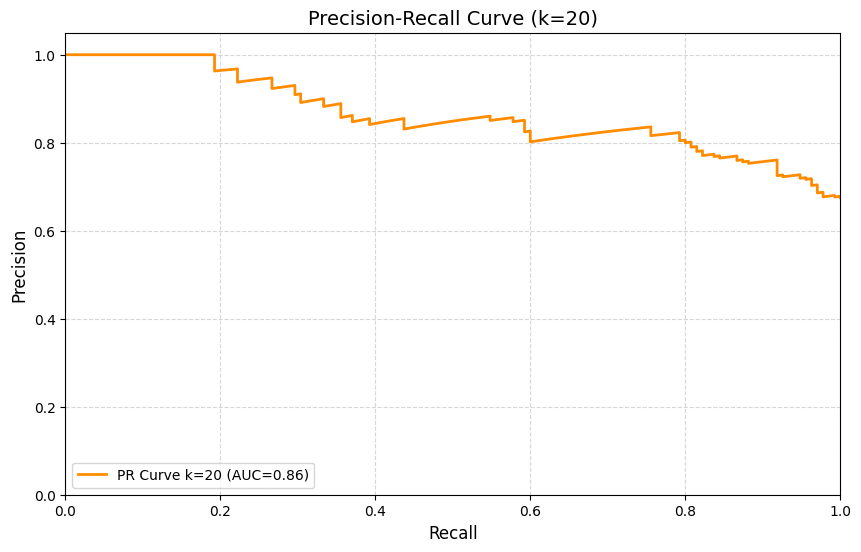

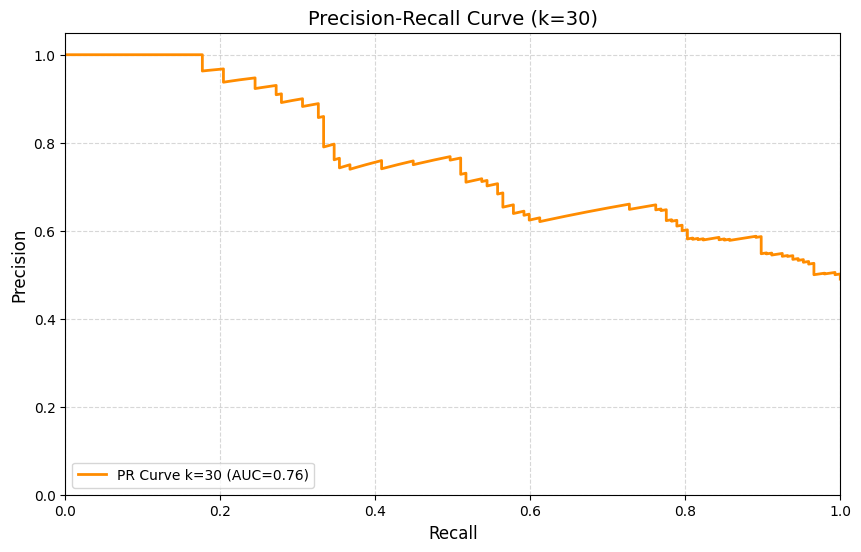

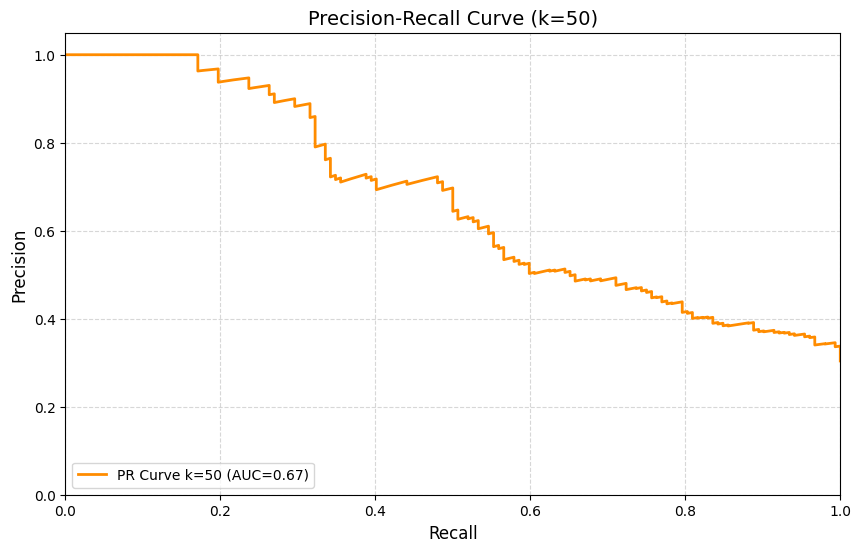

In [12]:
qrels_dict = {}
qrels_df = pd.read_csv(qrels_file, sep=r'\s+', header=None, 
                       names=['QueryID', 'Iteration', 'DocID', 'Relevance'], 
                       dtype={'QueryID': str, 'DocID': str})
for _, row in qrels_df.iterrows():
    if row['Relevance'] > 0:
        if row['QueryID'] not in qrels_dict: qrels_dict[row['QueryID']] = set()
        qrels_dict[row['QueryID']].add(row['DocID'])

for k in k_scenarios:
    y_true = []
    y_scores = []
    
    results_file_path = f"../results/phase1_results_k{k}.txt"
    
    if os.path.exists(results_file_path):
        with open(results_file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                qid = parts[0]; doc_id = parts[2]; score = float(parts[4])
                
                is_relevant = 1 if (qid in qrels_dict and doc_id in qrels_dict[qid]) else 0
                y_true.append(is_relevant)
                y_scores.append(score)
        
        try:
            precision, recall, _ = precision_recall_curve(y_true, y_scores)
            pr_auc = auc(recall, precision)
            
            plt.figure(figsize=(10, 6))
            plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR Curve k={k} (AUC={pr_auc:.2f})')
            plt.title(f'Precision-Recall Curve (k={k})', fontsize=14)
            plt.xlabel('Recall', fontsize=12)
            plt.ylabel('Precision', fontsize=12)
            plt.legend(loc="lower left")
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.show()
            
        except Exception as e:
            print(f"Error creating PR Curve for k={k}: {e}")
    else:
        print(f"Results file for k={k} not found.")